<a href="https://colab.research.google.com/github/Alexey504/SalePricePrediction/blob/main/SalePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# EDA

Общая информация о датасете

In [ ]:
print(train_df.shape)
print(test_df.shape)

(1460, 21)
(1459, 20)


In [ ]:
train_df.head()

,LandContour,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,ExterQual,OpenPorchSF,Heating,Condition2,...,GarageCars,KitchenQual,KitchenAbvGr,GrLivArea,2ndFlrSF,CentralAir,BsmtQual,TotalBsmtSF,Fireplaces,SalePrice
0,Lvl,2003.0,2,856,706,8,Gd,61,GasA,Norm,...,2,Gd,1,1710,854,Y,Gd,856,0,208500
1,Lvl,1976.0,2,1262,978,6,TA,0,GasA,Norm,...,2,TA,1,1262,0,Y,Gd,1262,1,181500
2,Lvl,2001.0,2,920,486,6,Gd,42,GasA,Norm,...,2,Gd,1,1786,866,Y,Gd,920,1,223500
3,Lvl,1998.0,1,961,216,7,TA,35,GasA,Norm,...,3,Gd,1,1717,756,Y,TA,756,1,140000
4,Lvl,2000.0,2,1145,655,9,Gd,84,GasA,Norm,...,3,Gd,1,2198,1053,Y,Gd,1145,1,250000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LandContour   1460 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   FullBath      1460 non-null   int64  
 3   1stFlrSF      1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   TotRmsAbvGrd  1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   OpenPorchSF   1460 non-null   int64  
 8   Heating       1460 non-null   object 
 9   Condition2    1460 non-null   object 
 10  OverallQual   1460 non-null   int64  
 11  GarageCars    1460 non-null   int64  
 12  KitchenQual   1460 non-null   object 
 13  KitchenAbvGr  1460 non-null   int64  
 14  GrLivArea     1460 non-null   int64  
 15  2ndFlrSF      1460 non-null   int64  
 16  CentralAir    1460 non-null   object 
 17  BsmtQual      1423 non-null   object 
 18  TotalBsmtSF   1460 non-null 

In [ ]:
train_df.describe()

,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,OpenPorchSF,OverallQual,GarageCars,KitchenAbvGr,GrLivArea,2ndFlrSF,TotalBsmtSF,Fireplaces,SalePrice
count,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1.565068,1162.626712,443.639726,6.517808,46.660274,6.099315,1.767123,1.046575,1515.463699,346.992466,1057.429452,0.613014,180921.195890
std,24.689725,0.550916,386.587738,456.098091,1.625393,66.256028,1.382997,0.747315,0.220338,525.480383,436.528436,438.705324,0.644666,79442.502883
min,1900.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,1961.000000,1.000000,882.000000,0.000000,5.000000,0.000000,5.000000,1.000000,1.000000,1129.500000,0.000000,795.750000,0.000000,129975.000000
50%,1980.000000,2.000000,1087.000000,383.500000,6.000000,25.000000,6.000000,2.000000,1.000000,1464.000000,0.000000,991.500000,1.000000,163000.000000
75%,2002.000000,2.000000,1391.250000,712.250000,7.000000,68.000000,7.000000,2.000000,1.000000,1776.750000,728.000000,1298.250000,1.000000,214000.000000
max,2010.000000,3.000000,4692.000000,5644.000000,14.000000,547.000000,10.000000,4.000000,3.000000,5642.000000,2065.000000,6110.000000,3.000000,755000.000000


In [ ]:
# пропуски данных
train_df.isna().sum()

LandContour      0
GarageYrBlt     81
FullBath         0
1stFlrSF         0
BsmtFinSF1       0
TotRmsAbvGrd     0
ExterQual        0
OpenPorchSF      0
Heating          0
Condition2       0
OverallQual      0
GarageCars       0
KitchenQual      0
KitchenAbvGr     0
GrLivArea        0
2ndFlrSF         0
CentralAir       0
BsmtQual        37
TotalBsmtSF      0
Fireplaces       0
SalePrice        0
dtype: int64

In [ ]:
# уникальные значения по признакам
for col in train_df.columns:
    num = train_df[col].nunique()
    print(f'number of unique {col}: {num}')

number of unique LandContour: 4
number of unique GarageYrBlt: 97
number of unique FullBath: 4
number of unique 1stFlrSF: 753
number of unique BsmtFinSF1: 637
number of unique TotRmsAbvGrd: 12
number of unique ExterQual: 4
number of unique OpenPorchSF: 202
number of unique Heating: 6
number of unique Condition2: 8
number of unique OverallQual: 10
number of unique GarageCars: 5
number of unique KitchenQual: 4
number of unique KitchenAbvGr: 4
number of unique GrLivArea: 861
number of unique 2ndFlrSF: 417
number of unique CentralAir: 2
number of unique BsmtQual: 4
number of unique TotalBsmtSF: 721
number of unique Fireplaces: 4
number of unique SalePrice: 663


In [ ]:
train_df.GarageYrBlt.value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [ ]:
train_df.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

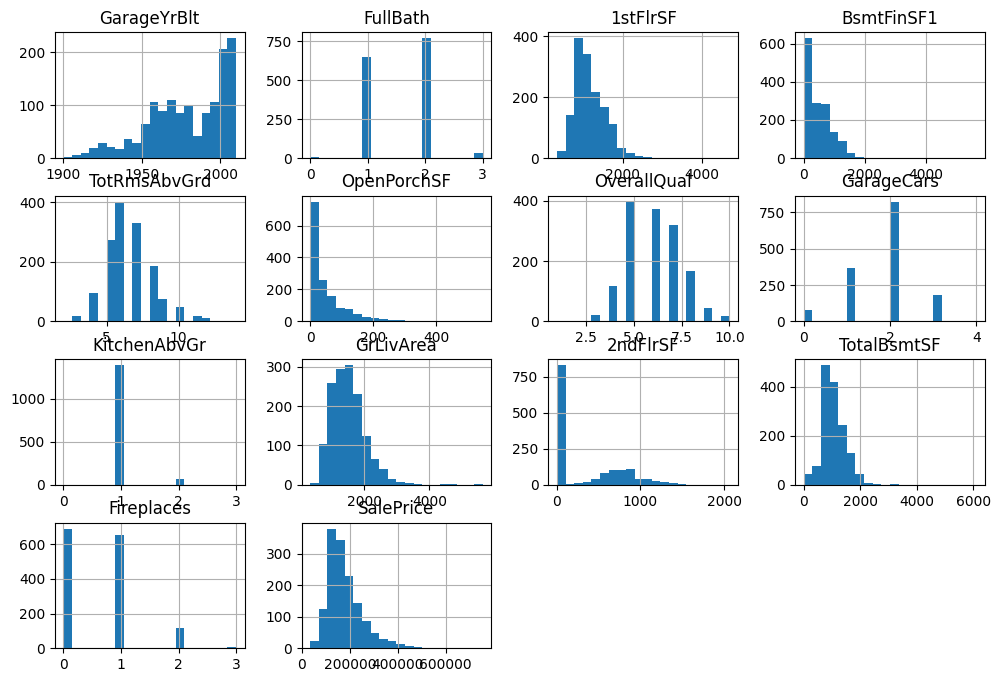

In [ ]:
# распределение числовых признаков
train_df.hist(bins=20, figsize=(12,8))
plt.show()

In [ ]:
# отдельно категориальные признаки
df_cat = train_df.select_dtypes(include = ['object'])
df_cat.head()

,LandContour,ExterQual,Heating,Condition2,KitchenQual,CentralAir,BsmtQual
0,Lvl,Gd,GasA,Norm,Gd,Y,Gd
1,Lvl,TA,GasA,Norm,TA,Y,Gd
2,Lvl,Gd,GasA,Norm,Gd,Y,Gd
3,Lvl,TA,GasA,Norm,Gd,Y,TA
4,Lvl,Gd,GasA,Norm,Gd,Y,Gd


In [ ]:
# уникальные значения по категориальным признакам
for col in df_cat.columns:
    num = df_cat[col].nunique()
    print(f'number of unique {col}: {num}')

number of unique LandContour: 4
number of unique ExterQual: 4
number of unique Heating: 6
number of unique Condition2: 8
number of unique KitchenQual: 4
number of unique CentralAir: 2
number of unique BsmtQual: 4


In [ ]:
for col in df_cat.columns:
  print(df_cat[col].value_counts())
  print()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

CentralAir
Y    1365
N      95
Name: count, dtype: int64

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


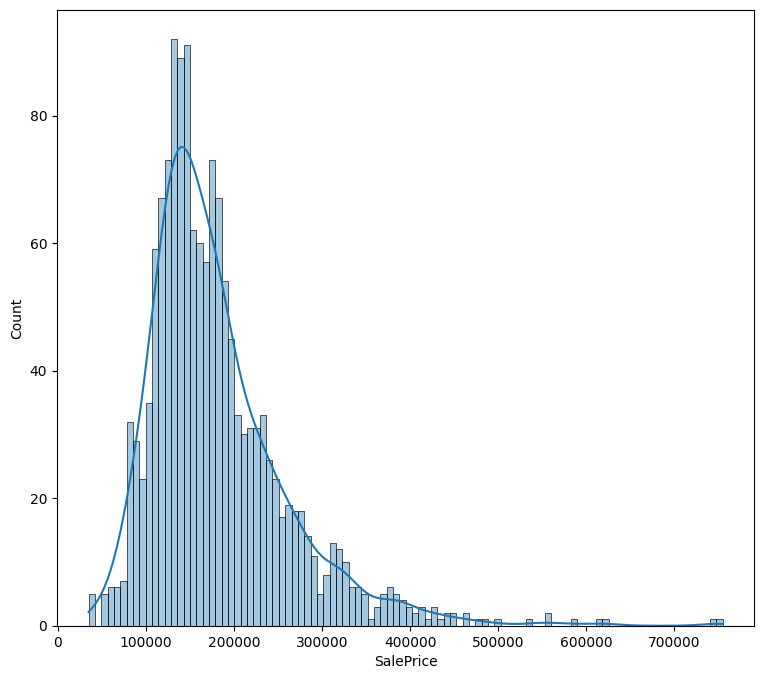

In [ ]:
# распределение таргета
print(train_df.SalePrice.describe())
plt.figure(figsize=(9, 8))
sns.histplot(train_df.SalePrice, kde=True, bins=100, alpha= .4);

# Оценка корреляции признаков

In [ ]:
houses = train_df.copy()

In [ ]:
# замена пропущенных значений
houses.BsmtQual.fillna("NoBasement", inplace=True)
houses.GarageYrBlt.fillna(houses.GarageYrBlt.mean(), inplace=True)

In [ ]:
cat_attribs = [cname for cname in houses.columns if
                    houses[cname].dtype == 'object']
for col in houses[cat_attribs]:
    houses[col] = houses[col].astype('category')

In [ ]:
num_attribs = [nname for nname in houses.columns if
                    houses[nname].dtype in ['float64', 'int64']]

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LandContour   1460 non-null   category
 1   GarageYrBlt   1460 non-null   float64 
 2   FullBath      1460 non-null   int64   
 3   1stFlrSF      1460 non-null   int64   
 4   BsmtFinSF1    1460 non-null   int64   
 5   TotRmsAbvGrd  1460 non-null   int64   
 6   ExterQual     1460 non-null   category
 7   OpenPorchSF   1460 non-null   int64   
 8   Heating       1460 non-null   category
 9   Condition2    1460 non-null   category
 10  OverallQual   1460 non-null   int64   
 11  GarageCars    1460 non-null   int64   
 12  KitchenQual   1460 non-null   category
 13  KitchenAbvGr  1460 non-null   int64   
 14  GrLivArea     1460 non-null   int64   
 15  2ndFlrSF      1460 non-null   int64   
 16  CentralAir    1460 non-null   category
 17  BsmtQual      1460 non-null   category
 18  TotalBsm

In [ ]:
# кодирование категориальных признаков для проверки корреляции
OH_encoder = OneHotEncoder(handle_unknown='ignore',
                           sparse=False)
OH_houses_col = pd.DataFrame(OH_encoder.fit_transform(houses[cat_attribs]), columns=OH_encoder.get_feature_names_out())
OH_houses_col.index = houses.index
num_houses = houses.drop(cat_attribs, axis=1)
OH_houses = pd.concat([num_houses, OH_houses_col], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
corr_matrix = OH_houses.corr()

In [ ]:
# корреляция относительно таргета
corr_matrix.SalePrice.sort_values(ascending=False)

SalePrice              1.000000
OverallQual            0.790982
GrLivArea              0.708624
GarageCars             0.640409
TotalBsmtSF            0.613581
1stFlrSF               0.605852
FullBath               0.560664
BsmtQual_Ex            0.553105
TotRmsAbvGrd           0.533723
KitchenQual_Ex         0.504094
GarageYrBlt            0.470177
Fireplaces             0.466929
ExterQual_Gd           0.452466
ExterQual_Ex           0.451164
BsmtFinSF1             0.386420
KitchenQual_Gd         0.321641
2ndFlrSF               0.319334
OpenPorchSF            0.315856
CentralAir_Y           0.251328
BsmtQual_Gd            0.234822
LandContour_HLS        0.120014
Heating_GasA           0.092529
Condition2_PosN        0.048481
Condition2_PosA        0.047497
LandContour_Low        0.045528
Condition2_Norm        0.030676
Condition2_RRAe        0.002993
Condition2_RRAn       -0.014510
Heating_GasW          -0.020103
Heating_OthW          -0.025730
LandContour_Lvl       -0.027545
Conditio

<Axes: >

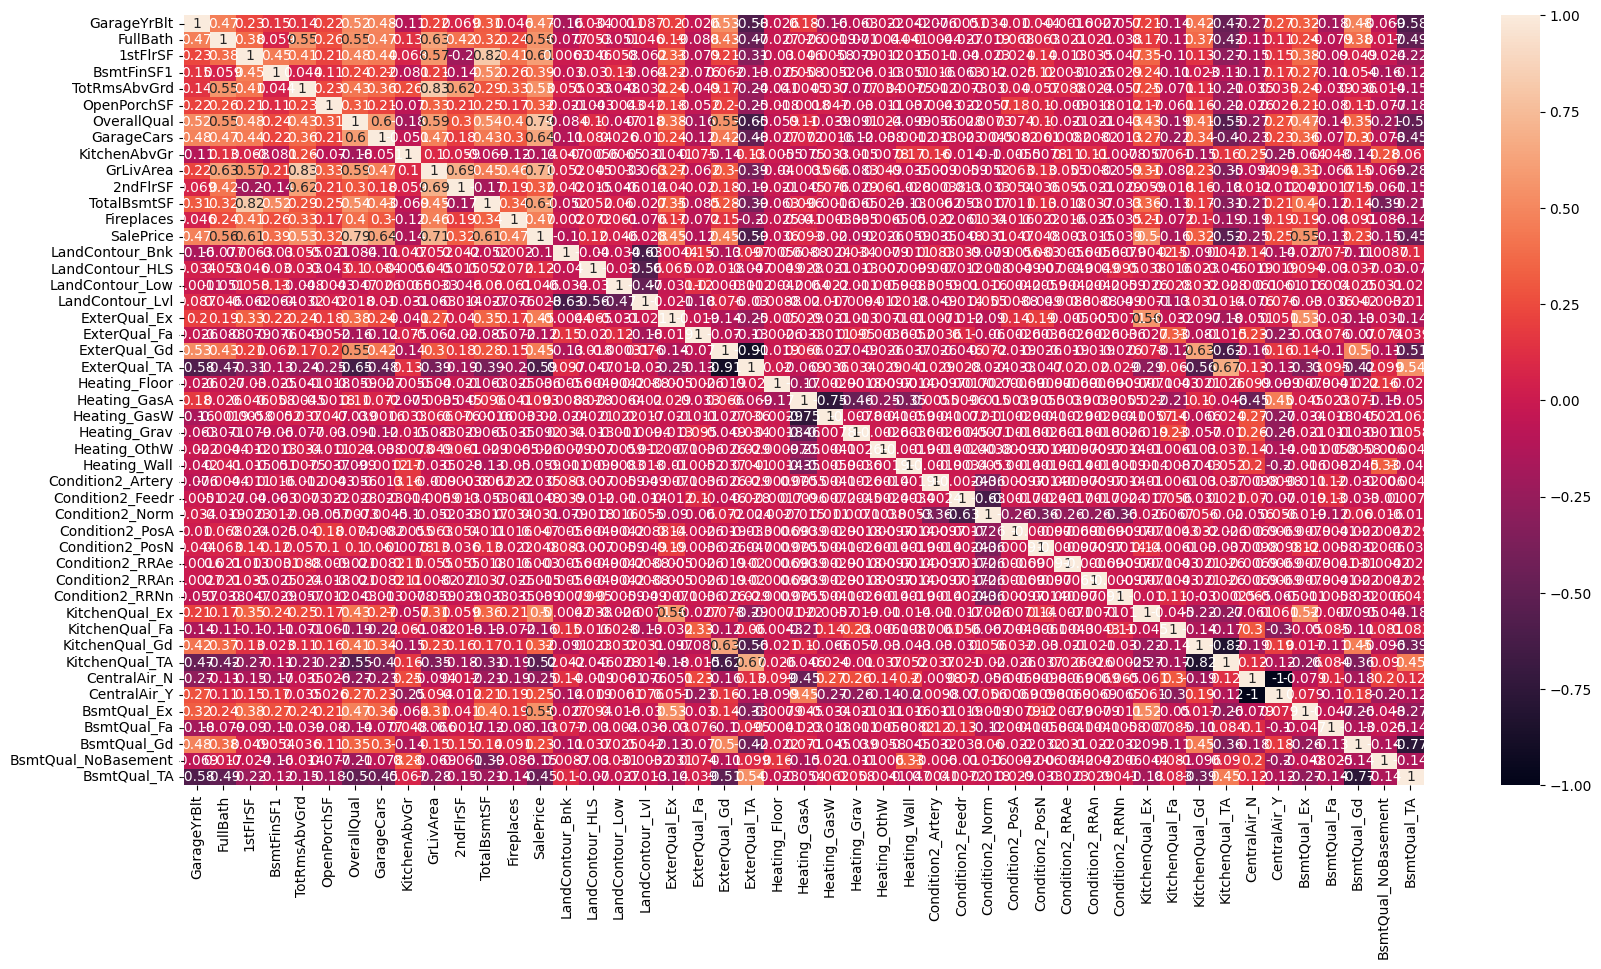

In [ ]:
plt.figure(figsize= (20, 10))
sns.heatmap(corr_matrix, annot = True)

Явных зависимостей признаков не обнаружено

# Создание пайплайна обработки признаков

In [ ]:
housing = train_df.drop("SalePrice", axis=1)
housing_labels = train_df["SalePrice"].copy()

In [ ]:
cat_attribs_OH = ['Condition2', 'CentralAir', 'Heating', 'LandContour']  # признаки для OHE

cat_attribs = ['ExterQual', 'KitchenQual', 'BsmtQual']  # признаки для OrdinalEncoding

num_attribs = ['GarageYrBlt', 'FullBath', '1stFlrSF', 'BsmtFinSF1', 'TotRmsAbvGrd',
               'OpenPorchSF', 'GarageCars', 'KitchenAbvGr', 'GrLivArea', '2ndFlrSF',
               'TotalBsmtSF', 'Fireplaces', 'OverallQual']

cats_order = [['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in range(3)]

# cats_overq_order = [['NA', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]

cats_overq_order = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [ ]:
cat_pipeline_OH = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown="ignore")
    )

cat_pipeline= make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OrdinalEncoder(categories=cats_order),
    StandardScaler()
    )

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
    )

In [ ]:
def change_type(X, y=None):
  return pd.DataFrame(X).astype('object')


def change_pipeline():
    return make_pipeline(
        FunctionTransformer(change_type, feature_names_out="one-to-one"),
        SimpleImputer(strategy="constant", fill_value="NA"),
        OrdinalEncoder(categories=cats_overq_order),
        StandardScaler())


preprocessing = ColumnTransformer([
    #("num_to_cat", change_pipeline(), ['OverallQual']),
    ("cat", cat_pipeline, cat_attribs),
    ("cat_OH", cat_pipeline_OH, cat_attribs_OH),
    ("num", num_pipeline, num_attribs),
])

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(1460, 36)

In [ ]:
preprocessing.get_feature_names_out()

array(['cat__ExterQual', 'cat__KitchenQual', 'cat__BsmtQual',
       'cat_OH__Condition2_Artery', 'cat_OH__Condition2_Feedr',
       'cat_OH__Condition2_Norm', 'cat_OH__Condition2_PosA',
       'cat_OH__Condition2_PosN', 'cat_OH__Condition2_RRAe',
       'cat_OH__Condition2_RRAn', 'cat_OH__Condition2_RRNn',
       'cat_OH__CentralAir_N', 'cat_OH__CentralAir_Y',
       'cat_OH__Heating_Floor', 'cat_OH__Heating_GasA',
       'cat_OH__Heating_GasW', 'cat_OH__Heating_Grav',
       'cat_OH__Heating_OthW', 'cat_OH__Heating_Wall',
       'cat_OH__LandContour_Bnk', 'cat_OH__LandContour_HLS',
       'cat_OH__LandContour_Low', 'cat_OH__LandContour_Lvl',
       'num__GarageYrBlt', 'num__FullBath', 'num__1stFlrSF',
       'num__BsmtFinSF1', 'num__TotRmsAbvGrd', 'num__OpenPorchSF',
       'num__GarageCars', 'num__KitchenAbvGr', 'num__GrLivArea',
       'num__2ndFlrSF', 'num__TotalBsmtSF', 'num__Fireplaces',
       'num__OverallQual'], dtype=object)

In [ ]:
prep_df = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out())
prep_df.head()

,cat__ExterQual,cat__KitchenQual,cat__BsmtQual,cat_OH__Condition2_Artery,cat_OH__Condition2_Feedr,cat_OH__Condition2_Norm,cat_OH__Condition2_PosA,cat_OH__Condition2_PosN,cat_OH__Condition2_RRAe,cat_OH__Condition2_RRAn,...,num__BsmtFinSF1,num__TotRmsAbvGrd,num__OpenPorchSF,num__GarageCars,num__KitchenAbvGr,num__GrLivArea,num__2ndFlrSF,num__TotalBsmtSF,num__Fireplaces,num__OverallQual
0,1.052302,0.735994,0.583168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.575425,0.912210,0.216503,0.311725,-0.211454,0.370333,1.161852,-0.459303,-0.951226,0.651479
1,-0.689604,-0.771091,0.583168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.171992,-0.318683,-0.704483,0.311725,-0.211454,-0.482512,-0.795163,0.466465,0.600495,-0.071836
2,1.052302,0.735994,0.583168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.092907,-0.318683,-0.070361,0.311725,-0.211454,0.515013,1.189351,-0.313369,0.600495,0.651479
3,-0.689604,0.735994,-0.558153,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.499274,0.296763,-0.176048,1.650307,-0.211454,0.383659,0.937276,-0.687324,0.600495,0.651479
4,1.052302,0.735994,0.583168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.463568,1.527656,0.563760,1.650307,-0.211454,1.299326,1.617877,0.199680,0.600495,1.374795


# Обучение

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.3 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_squared_error

Метрику качества выбираю **RMSE** из-за удобной интерпретации результата. **RMSE** измеряется в тех же единицах, что и переменная ответа.

In [ ]:
def test_model(prep, clf, X, y):
  model = make_pipeline(prep, clf)
  model.fit(X, y)
  rmse = -cross_val_score(model, X, y,
                                    scoring="neg_root_mean_squared_error", cv=10)  # neg_root_mean_squared_error
  print(f'{type(clf).__name__} : {rmse.mean()}')

In [ ]:
# использую основные алгоритмы регрессии для сравнения между собой
models = []
models.append(DecisionTreeRegressor(random_state=42))
models.append(XGBRegressor(n_estimators=100, random_state=42))
models.append(RandomForestRegressor(n_estimators=100, random_state=42))
models.append(GradientBoostingRegressor(n_estimators=100, random_state=42))
models.append(CatBoostRegressor(random_state=42, silent=True, n_estimators=100))
models.append(ExtraTreesRegressor(random_state=42))
models.append(HistGradientBoostingRegressor(random_state=42))
models.append(AdaBoostRegressor(n_estimators=100, random_state=42))

for m in models:
    test_model(preprocessing, m, housing, housing_labels)

DecisionTreeRegressor : 39041.77541116972
XGBRegressor : 29047.121199856476
RandomForestRegressor : 29194.90814605307
GradientBoostingRegressor : 27453.792743119942
CatBoostRegressor : 27793.950806668036
ExtraTreesRegressor : 28597.63661919997


Модели **GradientBoostingRegressor** и **CatBoostRegressor** показали лучшие результаты. Попробую сделать самостоятельный пайплайн для CatBoost, передав в него категориальные признаки без самостоятельного кодирования.

# Пайплайн для CatBoost

In [ ]:
housing_cb = train_df.drop("SalePrice", axis=1)
housing_cb_labels = train_df["SalePrice"].copy()

In [ ]:
cat_attribs_cb = ['Condition2', 'CentralAir', 'Heating',
                  'LandContour', 'ExterQual', 'KitchenQual', 'BsmtQual']

num_attribs_cb = ['GarageYrBlt', 'FullBath', '1stFlrSF', 'BsmtFinSF1', 'TotRmsAbvGrd',
               'OpenPorchSF', 'GarageCars', 'KitchenAbvGr', 'GrLivArea', '2ndFlrSF',
               'TotalBsmtSF', 'Fireplaces', 'OverallQual']

In [ ]:
cat_pipeline_cb= make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    )

num_pipeline_cb = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
    )

In [ ]:
def change_type(X, y=None):
  return pd.DataFrame(X).astype('object')


def change_pipeline():
    return make_pipeline(
        FunctionTransformer(change_type, feature_names_out="one-to-one"),
        SimpleImputer(strategy="constant", fill_value="NA"))


preprocessing_cb = ColumnTransformer([
    #("num_to_cat", change_pipeline(), ['OverallQual']),
    ("cat", cat_pipeline_cb, cat_attribs_cb),
    ("num", num_pipeline_cb, num_attribs_cb),
])

In [ ]:
housing_prepared_cb = preprocessing_cb.fit_transform(housing_cb)
housing_prepared_cb.shape

(1460, 20)

In [ ]:
preprocessing_cb.get_feature_names_out()

array(['cat__Condition2', 'cat__CentralAir', 'cat__Heating',
       'cat__LandContour', 'cat__ExterQual', 'cat__KitchenQual',
       'cat__BsmtQual', 'num__GarageYrBlt', 'num__FullBath',
       'num__1stFlrSF', 'num__BsmtFinSF1', 'num__TotRmsAbvGrd',
       'num__OpenPorchSF', 'num__GarageCars', 'num__KitchenAbvGr',
       'num__GrLivArea', 'num__2ndFlrSF', 'num__TotalBsmtSF',
       'num__Fireplaces', 'num__OverallQual'], dtype=object)

In [ ]:
prep_df_cb = pd.DataFrame(housing_prepared_cb, columns=preprocessing_cb.get_feature_names_out())
prep_df_cb.head()

,cat__Condition2,cat__CentralAir,cat__Heating,cat__LandContour,cat__ExterQual,cat__KitchenQual,cat__BsmtQual,num__GarageYrBlt,num__FullBath,num__1stFlrSF,num__BsmtFinSF1,num__TotRmsAbvGrd,num__OpenPorchSF,num__GarageCars,num__KitchenAbvGr,num__GrLivArea,num__2ndFlrSF,num__TotalBsmtSF,num__Fireplaces,num__OverallQual
0,Norm,Y,GasA,Lvl,Gd,Gd,Gd,1.017598,0.789741,-0.793434,0.575425,0.91221,0.216503,0.311725,-0.211454,0.370333,1.161852,-0.459303,-0.951226,0.651479
1,Norm,Y,GasA,Lvl,TA,TA,Gd,-0.107927,0.789741,0.25714,1.171992,-0.318683,-0.704483,0.311725,-0.211454,-0.482512,-0.795163,0.466465,0.600495,-0.071836
2,Norm,Y,GasA,Lvl,Gd,Gd,Gd,0.934226,0.789741,-0.627826,0.092907,-0.318683,-0.070361,0.311725,-0.211454,0.515013,1.189351,-0.313369,0.600495,0.651479
3,Norm,Y,GasA,Lvl,TA,Gd,TA,0.809167,-1.026041,-0.521734,-0.499274,0.296763,-0.176048,1.650307,-0.211454,0.383659,0.937276,-0.687324,0.600495,0.651479
4,Norm,Y,GasA,Lvl,Gd,Gd,Gd,0.89254,0.789741,-0.045611,0.463568,1.527656,0.56376,1.650307,-0.211454,1.299326,1.617877,0.19968,0.600495,1.374795


# Обучение CatBoost

In [ ]:
# передаем категориальные признаки по номерам столцов
cat_cb = list(range(7))

In [ ]:
def test_model(prep, clf, X, y):
  model = make_pipeline(prep, clf)
  model.fit(X, y)
  rmse = -cross_val_score(model, X, y,
                                    scoring="neg_root_mean_squared_error", cv=10)  # neg_root_mean_squared_error
  print(f'{type(clf).__name__} : {rmse.mean()}')

In [ ]:
# CatBoost использует различные методы кодирования признаков. Попробуем все
catboost_models = []
catboost_models.append(CatBoostRegressor(cat_features=cat_cb, n_estimators=100, silent=True, eval_metric='RMSE', random_state=42))
catboost_models.append(CatBoostRegressor(cat_features=cat_cb, simple_ctr='Borders', n_estimators=100, combinations_ctr='Borders', silent=True, eval_metric='RMSE', random_state=42))
catboost_models.append(CatBoostRegressor(cat_features=cat_cb, simple_ctr='Buckets', n_estimators=100, combinations_ctr='Buckets', silent=True, eval_metric='RMSE', random_state=42))
catboost_models.append(CatBoostRegressor(cat_features=cat_cb, simple_ctr='BinarizedTargetMeanValue', n_estimators=100, combinations_ctr='BinarizedTargetMeanValue', silent=True, eval_metric='RMSE', random_state=42))
catboost_models.append(CatBoostRegressor(cat_features=cat_cb, simple_ctr='Counter', n_estimators=100, combinations_ctr='Counter', silent=True, eval_metric='RMSE', random_state=42))


In [ ]:
for m in catboost_models:
    test_model(preprocessing_cb, m, housing_cb, housing_cb_labels)

CatBoostRegressor : 27862.59842770346
CatBoostRegressor : 28713.96221735694
CatBoostRegressor : 28537.544185895513
CatBoostRegressor : 28713.96221735694
CatBoostRegressor : 27852.387721045397


Прихожу к выводу, что данный подход не дал знаительное уменьшение rmse. При использовании GridSearchCV лучший результат **RMSE = 27582** при {'CatBoost__depth': 5,
 'CatBoost__iterations': 300,
 'CatBoost__learning_rate': 0.1}.

---

*Поэтому возвращаюсь к изначальным моделям*

# Подбор параметров модели

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
full_pipeline = Pipeline([
        # ("preprocessing", preprocessing_cb),
        # ("CatBoost", CatBoostRegressor(cat_features=cat_cb, simple_ctr='Counter',  # n_estimators=100, silent=True
        #                    combinations_ctr='Counter', silent=True, eval_metric='RMSE', random_state=42)),
        ("preprocessing", preprocessing),
        ("GBR", GradientBoostingRegressor(random_state=42)),
        #("CatBoost", CatBoostRegressor(random_state=42, silent=True)),
    ])

param_grid = {
        # "CatBoost__iterations": [100, 300, 500],
        #"CatBoost__n_estimators": [300, 500],
        #"CatBoost__learning_rate": [0.01, 0.1],
        #"CatBoost__depth": [6, 10],
        #"CatBoost__l2_leaf_reg": [3, 6, 9],
        #"CatBoost__random_strength": [1, 5, 9],
         "GBR__learning_rate": [0.001, 0.1],
         "GBR__n_estimators": [100, 300, 600],
         "GBR__max_depth": [3, 5, 10],
         "GBR__criterion": ['friedman_mse', 'squared_error'],
         "GBR__max_features": [None, 'sqrt', 'log2'],
}

grid_search_3 = GridSearchCV(estimator=full_pipeline, param_grid=param_grid, cv=3,
                               scoring='neg_root_mean_squared_error', verbose=2)

# grid_search.fit(housing_cb, housing_cb_labels)

grid_search_3.fit(housing, housing_labels)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END GBR__criterion=friedman_mse, GBR__learning_rate=0.001, GBR__max_depth=3, GBR__max_features=None, GBR__n_estimators=100; total time=   0.3s
[CV] END GBR__criterion=friedman_mse, GBR__learning_rate=0.001, GBR__max_depth=3, GBR__max_features=None, GBR__n_estimators=100; total time=   0.3s
[CV] END GBR__criterion=friedman_mse, GBR__learning_rate=0.001, GBR__max_depth=3, GBR__max_features=None, GBR__n_estimators=100; total time=   0.3s
[CV] END GBR__criterion=friedman_mse, GBR__learning_rate=0.001, GBR__max_depth=3, GBR__max_features=None, GBR__n_estimators=300; total time=   0.9s
[CV] END GBR__criterion=friedman_mse, GBR__learning_rate=0.001, GBR__max_depth=3, GBR__max_features=None, GBR__n_estimators=300; total time=   0.9s
[CV] END GBR__criterion=friedman_mse, GBR__learning_rate=0.001, GBR__max_depth=3, GBR__max_features=None, GBR__n_estimators=300; total time=   0.9s
[CV] END GBR__criterion=friedman_mse, GBR__learni

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='constant')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['NA',
                                                                                                                      'Po',
                                                                                                                      'Fa',
                                                                                                                      'TA',
                                                                                                                      'Gd',
                                                                                                                      'Ex'],
                                                                                                                     ['NA',
                                                                                                                      'Po',
                                                                                                                      'Fa',
                                                                                                                      'TA',
                                                                                                                      'Gd',
                                                                                                                      'Ex'],
                                                                                                                     ['NA',
                                                                                                                      'Po',
                                                                                                                      'Fa',
                                                                                                                      'TA',
                                                                                                                      'Gd',
                                                                                                                      'Ex']])),
                                                                                         ('standardscaler',
                                                                                          Sta...
                                                                          '2ndFlrSF',
                                                                          'TotalBsmtSF',
                                                                          'Fireplaces',
                                                                          'OverallQual'])])),
                                       ('GBR',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'GBR__criterion': ['friedman_mse', 'squared_error'],
                         'GBR__learning_rate': [0.001, 0.1],
                         'GBR__max_depth': [3, 5, 10],
                         'GBR__max_features': [None, 'sqrt', 'log2'],
                         'GBR__n_estimators': [100, 300, 600]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_search.best_params_

{'CatBoost__depth': 5,
 'CatBoost__iterations': 300,
 'CatBoost__learning_rate': 0.1}

In [ ]:
grid_search_2.best_params_

{'CatBoost__depth': 6,
 'CatBoost__l2_leaf_reg': 3,
 'CatBoost__learning_rate': 0.1,
 'CatBoost__n_estimators': 300,
 'CatBoost__random_strength': 1}

In [ ]:
grid_search_3.best_params_

{'GBR__criterion': 'squared_error',
 'GBR__learning_rate': 0.1,
 'GBR__max_depth': 5,
 'GBR__max_features': 'sqrt',
 'GBR__n_estimators': 100}

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [ ]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_CatBoost__depth,param_CatBoost__iterations,param_CatBoost__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,1.165296,0.320634,0.013972,0.003368,5,300,0.1,"{'CatBoost__depth': 5, 'CatBoost__iterations':...",-25540.488501,-31359.390732,-28846.156651,-28582.011961,2382.888318,1
5,1.199703,0.020790,0.010711,0.000303,5,500,0.1,"{'CatBoost__depth': 5, 'CatBoost__iterations':...",-25781.161250,-31474.684865,-28872.967387,-28709.604501,2327.239905,2
9,7.051100,0.824244,0.011582,0.000359,10,300,0.1,"{'CatBoost__depth': 10, 'CatBoost__iterations'...",-27833.087441,-31066.791946,-27808.219230,-28902.699539,1530.278094,3
11,12.541099,0.100334,0.014698,0.003983,10,500,0.1,"{'CatBoost__depth': 10, 'CatBoost__iterations'...",-27863.987670,-31241.826119,-27897.916507,-29001.243432,1584.391760,4
1,0.202469,0.005698,0.012719,0.001793,5,100,0.1,"{'CatBoost__depth': 5, 'CatBoost__iterations':...",-27364.392468,-30738.938446,-30565.478791,-29556.269902,1551.508315,5


In [ ]:
cv_res_2 = pd.DataFrame(grid_search_2.cv_results_)
cv_res_2.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [ ]:
cv_res_2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_CatBoost__depth,param_CatBoost__l2_leaf_reg,param_CatBoost__learning_rate,param_CatBoost__n_estimators,param_CatBoost__random_strength,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,0.682612,0.003085,0.016247,0.000293,6,3,0.1,300,1,"{'CatBoost__depth': 6, 'CatBoost__l2_leaf_reg'...",-24003.575500,-29857.738427,-27459.526217,-27106.946715,2402.920463,1
21,1.643933,0.555995,0.026603,0.006851,6,6,0.1,500,1,"{'CatBoost__depth': 6, 'CatBoost__l2_leaf_reg'...",-24672.188943,-29741.015035,-27364.714645,-27259.306207,2070.681481,2
7,0.684109,0.004809,0.017542,0.001644,6,3,0.1,300,5,"{'CatBoost__depth': 6, 'CatBoost__l2_leaf_reg'...",-25369.546824,-29432.105825,-26976.452589,-27259.368413,1670.554286,3
9,1.499441,0.562467,0.017332,0.000684,6,3,0.1,500,1,"{'CatBoost__depth': 6, 'CatBoost__l2_leaf_reg'...",-24208.515689,-30135.566848,-27586.677167,-27310.253235,2427.590232,4
33,1.163069,0.112084,0.021299,0.006296,6,9,0.1,500,1,"{'CatBoost__depth': 6, 'CatBoost__l2_leaf_reg'...",-24236.148816,-29636.067341,-28081.306410,-27317.840856,2269.646046,5


In [ ]:
cv_res_3 = pd.DataFrame(grid_search_3.cv_results_)
cv_res_3.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [ ]:
cv_res_3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_GBR__criterion,param_GBR__learning_rate,param_GBR__max_depth,param_GBR__max_features,param_GBR__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
93,0.142018,0.001741,0.011553,0.000389,squared_error,0.1,5,sqrt,100,"{'GBR__criterion': 'squared_error', 'GBR__lear...",-24741.168952,-29463.308597,-27104.804282,-27103.093943,1927.805817,1
96,0.142467,0.000715,0.011683,0.000338,squared_error,0.1,5,log2,100,"{'GBR__criterion': 'squared_error', 'GBR__lear...",-24934.789783,-29463.308597,-27104.804282,-27167.634221,1849.293804,2
39,0.143619,0.003310,0.012171,0.000417,friedman_mse,0.1,5,sqrt,100,"{'GBR__criterion': 'friedman_mse', 'GBR__learn...",-24693.609375,-29591.540575,-27493.837502,-27259.662484,2006.416535,3
97,0.381714,0.015157,0.015666,0.001733,squared_error,0.1,5,log2,300,"{'GBR__criterion': 'squared_error', 'GBR__lear...",-25019.695975,-29795.437641,-27131.897294,-27315.676970,1954.014388,4
94,0.395277,0.012538,0.015091,0.000578,squared_error,0.1,5,sqrt,300,"{'GBR__criterion': 'squared_error', 'GBR__lear...",-25088.211997,-29795.437641,-27131.897294,-27338.515644,1927.262596,5


Лучший результат показала модель **GradientBoostingRegressor** с параметрами {'GBR__criterion': 'squared_error',
 'GBR__learning_rate': 0.1,
 'GBR__max_depth': 5,
 'GBR__max_features': 'sqrt',
 'GBR__n_estimators': 100}. Испоьзую ее для тестовой выборки.

# Итоговое предсказание

In [ ]:
final_model = grid_search_3.best_estimator_
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['NA',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['NA',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['ExterQual...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['GarageYrBlt', 'FullBath',
                                                   '1stFlrSF', 'BsmtFinSF1',
                                                   'TotRmsAbvGrd',
                                                   'OpenPorchSF', 'GarageCars',
                                                   'KitchenAbvGr', 'GrLivArea',
                                                   '2ndFlrSF', 'TotalBsmtSF',
                                                   'Fireplaces',
                                                   'OverallQual'])])),
                ('GBR',
                 GradientBoostingRegressor(criterion='squared_error',
                                           max_depth=5, max_features='sqrt',
                                           random_state=42))])

In [ ]:
final_predictions = final_model.predict(test_df)

In [ ]:
output = pd.DataFrame({'Id': test_df.index,
                       'SalePrice': final_predictions})
output

,Id,SalePrice
0,0,124499.394129
1,1,148183.185330
2,2,182109.267415
3,3,172410.835455
4,4,195380.780811
...,...,...
1454,1454,71450.250099
1455,1455,89575.031884
1456,1456,150053.889850
1457,1457,118912.647245


In [ ]:
output.to_csv('submission.csv', index=False)